In [1]:
import warnings
warnings.filterwarnings("ignore")  # to get rid of an annoying deprecation warning in pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


df = pd.read_csv("http://rulelaw.net/downloads/rol-scores.csv")
df.columns = [x.lower().strip() for x in df.columns]
df.head()

,state,pop. in millions for 2012,rolscore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012gdp,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


In [2]:
def regplane3d(y, x1, x2, df):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # get the regression fit
    model = sm.ols(formula='{} ~ {} + {}'.format(y, x1, x2), data = df)
    fit = model.fit()
    # lay out the range of x values for plotting and predicting
    # here I'm going to switch notation conventions from regression (y = x1 + x2) to 
    # dimensions s.t. x1 and x2 become x and y, and y becomes z (the 3rd dimension)
    x_surf = np.linspace(df[x1].min(), df[x1].max())
    y_surf = np.linspace(df[x2].min(), df[x2].max())
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    # predict over space of graph
    synthetic_data = pd.DataFrame({x1: x_surf.ravel(), x2: y_surf.ravel()})
    preds = fit.predict(exog=synthetic_data)
    # add surface plot
    ax.plot_surface(x_surf, y_surf, preds.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
    # add scatterplot
    ax.scatter(df[x1], df[x2], df[y],
           c='blue',
           marker='o',
           alpha=1)
    return fig

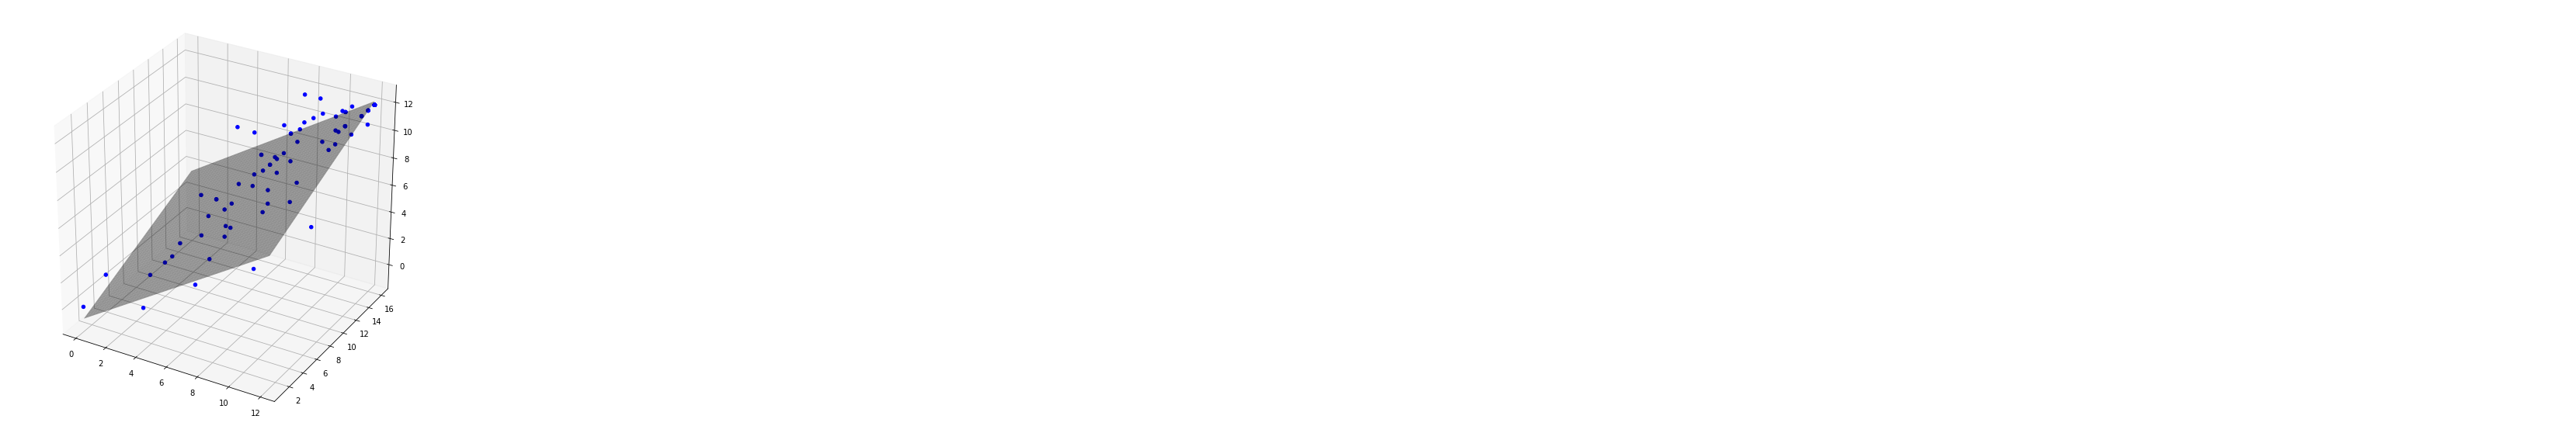

In [3]:
foo = regplane3d("elec_pros", "assoc_org", "free_expr", df)

In [4]:
plt.rcParams["figure.figsize"]

[6.0, 4.0]

In [5]:
foo.get_size_inches()

array([10., 10.])

In [6]:
foo.savefig("test.png")

that produces a file with the correct dimensions.  So there's clearly a jupyter bug. 

[This SO question](https://stackoverflow.com/questions/52636783/figsize-does-not-work-for-matplotlib-3d-plot) recounts the same bug.

In [7]:
!jupyter --version

4.4.0


In [8]:
import matplotlib
matplotlib.__version__

'3.0.0'